In [1]:
from pathlib import Path
from types import SimpleNamespace

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_path = "./benchmark_data/"

params = SimpleNamespace(
    dataset=[],
    size=[],
    machine=[],
    algorithm=[]
)

for data_file in Path(data_path).iterdir():
    if not data_file.is_file():
        continue
    _, dataset, size, machine, algorithm, *tail = data_file.name.split(".")
    if dataset not in params.dataset:
        params.dataset.append(dataset)
    if size not in params.size:
        params.size.append(size)
    if machine not in params.machine:
        params.machine.append(machine)
    if algorithm not in params.algorithm:
        params.algorithm.append(algorithm)

def load(dataset=None, size=None, machine=None, algorithm=None):
    matching_files = [
        str(data_file.absolute())
        for data_file in Path(data_path).iterdir()
        if (
            data_file.is_file() and
            file_match(data_file.name, dataset, size, machine, algorithm)
        )
    ]
    df = pd.concat(pd.read_pickle(path) for path in matching_files)
    split = df["method"].str.split(".", expand=True)
    df["dataset"] = split[1]
    df["size"] = split[2]
    df["machine"] = split[3]
    df["algorithm"] = split[4]
    return df

def file_match(filename, dataset, size, machine, algorithm):
    _, file_dataset, file_size, file_machine, file_algorithm, *tail = filename.split(".")
    return (
        match(dataset, file_dataset) and
        match(size, file_size) and
        match(machine, file_machine) and
        match(algorithm, file_algorithm)
    )

def match(pattern_or_labels, label):
    if pattern_or_labels is None:
        return True
    if isinstance(pattern_or_labels, str):
        pattern = pattern_or_labels
        return pattern in label
    else:
        labels = pattern_or_labels
        return label in labels
    
# load(dataset="lpw", algorithm="pfa").head()


## How does PuRe speed compare to 2D?

In [47]:
data = load(size="192", machine="ubuntu")

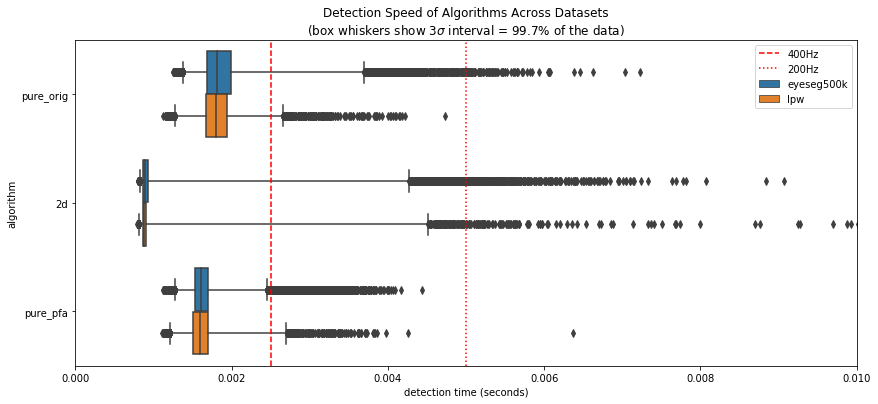

In [48]:
plt.figure(figsize=(14,6))
plt.title(
    "Detection Speed of Algorithms Across Datasets\n"
    "(box whiskers show $3\sigma$ interval = 99.7% of the data)"
)
sns.boxplot(data=data, x="time", hue="dataset", y="algorithm", whis=[0.15,99.85])
plt.axvline(1/400, c="r", ls="--", label="400Hz")
plt.axvline(1/200, c="r", ls=":", label="200Hz")
plt.xlim(0, 0.01)
plt.xlabel("detection time (seconds)")
plt.legend(loc=1)

## Does the operating system affect PuRe speed?

In [49]:
data = load(size="192", machine=("pupil-win", "pfa-ubuntu"), algorithm=("2d", "pure_pfa"))

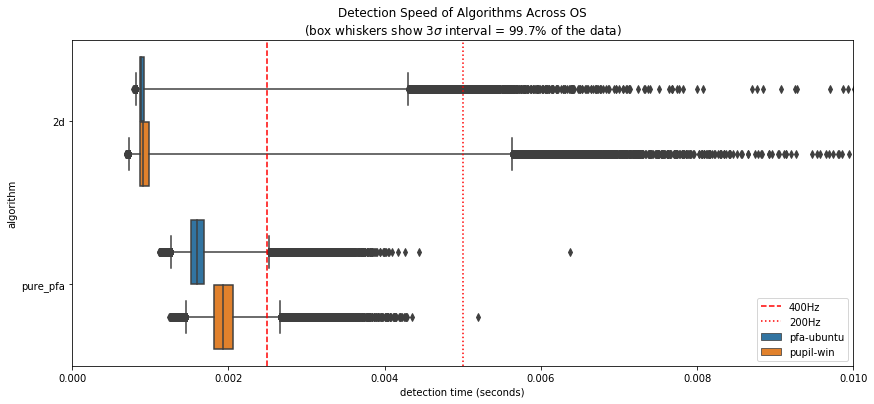

In [51]:
plt.figure(figsize=(14,6))
plt.title(
    "Detection Speed of Algorithms Across OS\n"
    "(box whiskers show $3\sigma$ interval = 99.7% of the data)"
)
sns.boxplot(data=data, x="time", hue="machine", y="algorithm", whis=[0.15,99.85])
plt.axvline(1/400, c="r", ls="--", label="400Hz")
plt.axvline(1/200, c="r", ls=":", label="200Hz")
plt.xlim(0, 0.01)
plt.xlabel("detection time (seconds)")
plt.legend(loc=4)